# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
FILE_PATH = '/content/drive/MyDrive/PES/ML3'

In [3]:
import os
os.chdir(FILE_PATH)

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data_df = pd.read_csv("bank.csv")

# Checking the data

In [6]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [7]:
data_df.shape

(515, 6)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


# Checking Summary Statistic

In [9]:
data_df.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


# Checking for Duplicates

In [10]:
data_df.duplicated().sum()

np.int64(0)

There are no Duplicates in the dataset

# Scaling the data

In [11]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [12]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [13]:
scaled_df = X.fit_transform(data_df.iloc[:,1:6])

In [14]:
scaled_df

array([[-0.07888413, -0.06497257,  1.02602411, -1.08710095,  0.48432644],
       [-1.64081915, -1.13811308, -0.58410514,  1.31763546, -1.949528  ],
       [ 1.10758573, -0.02978763, -0.19907423, -0.83517619,  0.84400936],
       ...,
       [ 1.51308809, -1.13811308,  0.92101568, -0.19391314,  0.92793538],
       [-0.60453534,  0.44520899, -1.66919225, -0.40003341, -1.12225728],
       [ 1.48305088,  0.62113366,  0.53598477, -0.53744692,  2.01897357]])

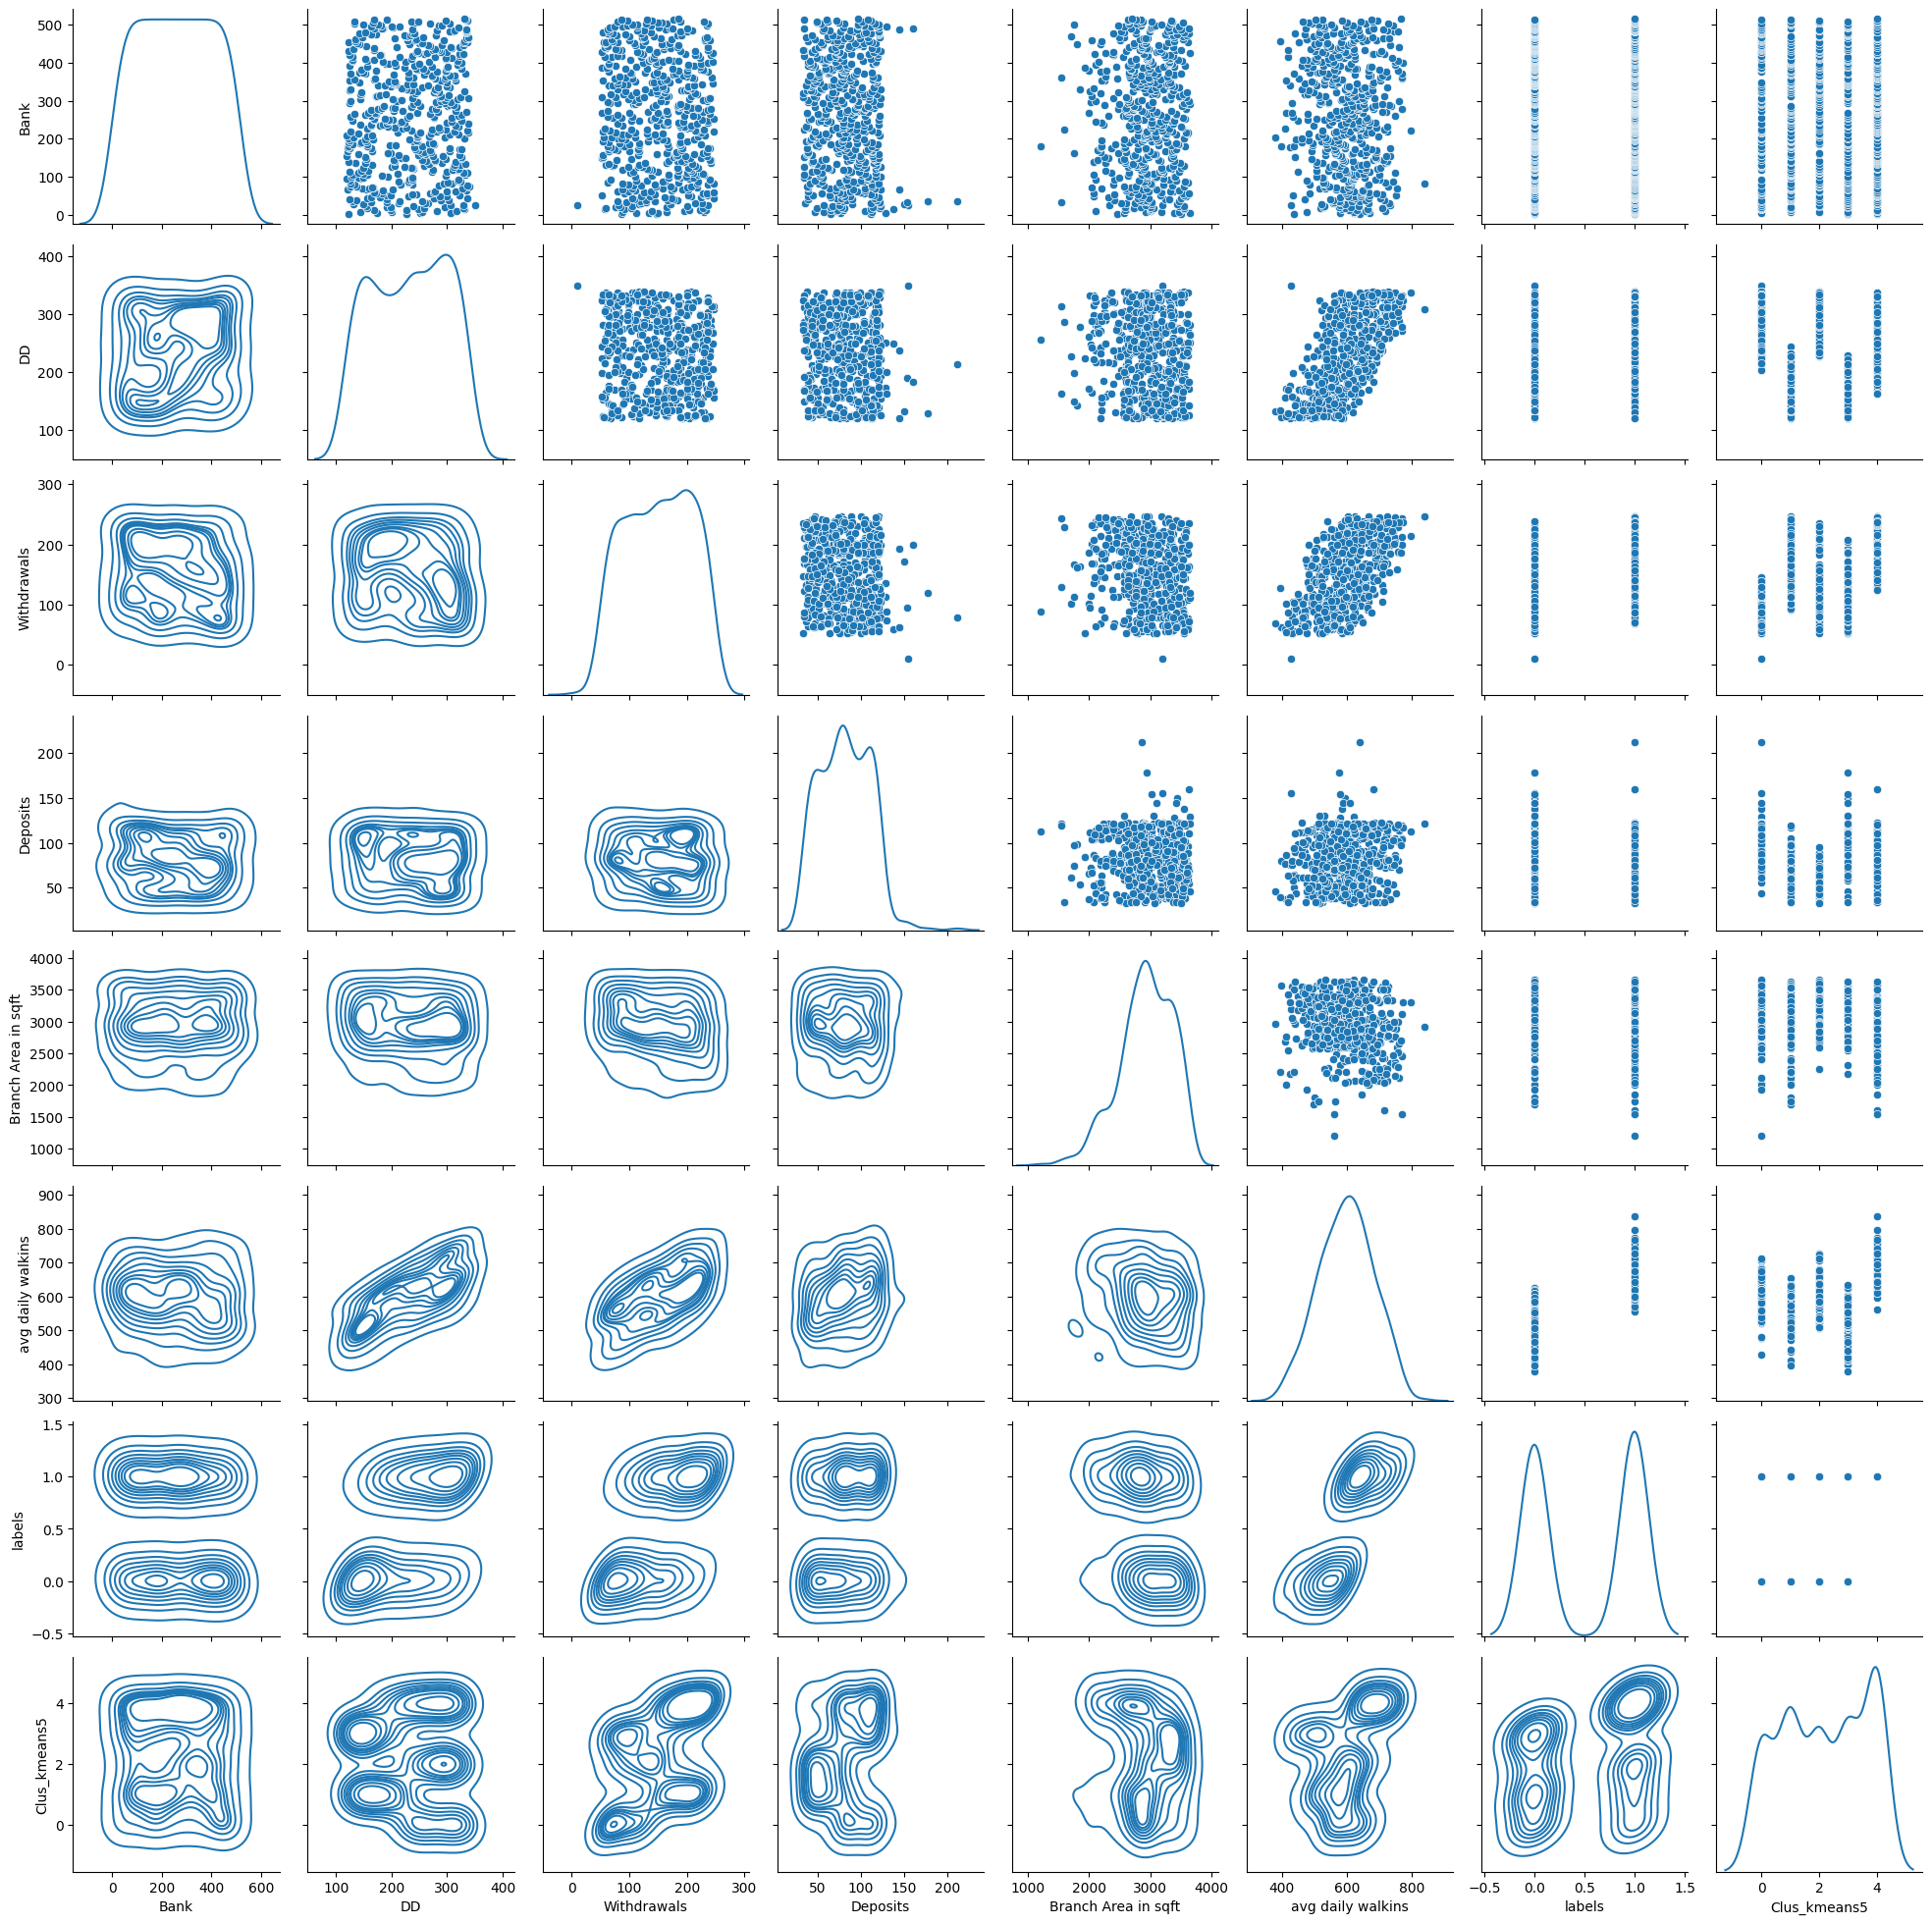

In [37]:
g = sns.PairGrid(data_df, diag_sharey=False) #each diagonal plot scales itself properly
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [16]:
# Create K Means cluster and store the result in the object k_means
k_means_2 = KMeans(n_clusters = 2)

In [17]:
# Fit K means on the scaled_df
k_means_2.fit(scaled_df)

KMeans(n_clusters=2)

### Cluster Output for all the observations

In [18]:
# Get the labels
k_means_2.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [19]:
data_df['labels']=k_means_2.labels_
data_df.sample(20)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,labels
209,210,321,144,49,3420,659,1
357,358,278,212,118,2460,770,1
168,169,270,190,113,2140,690,1
149,150,225,205,120,3340,692,1
421,422,258,198,119,2890,714,1
320,321,286,162,70,3600,616,1
175,176,304,237,37,2930,732,1
205,206,246,134,44,3090,567,0
148,149,218,224,115,2320,692,1
405,406,318,186,102,3000,756,1


### Within Cluster Sum of Squares

In [20]:
k_means_2.inertia_

1944.4251859896476

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [21]:
wss =[]
silhoutette=[]

In [22]:
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
    labels = KM.labels_
    silhoutette.append(silhouette_score(scaled_df,labels))

In [23]:
wss

[1946.1340553339337,
 1708.3088686985936,
 1394.5785072570868,
 1276.120816622977,
 1123.6716632324678,
 1051.656069496128,
 971.1844109586092,
 905.0188284144697,
 874.3265724507531]

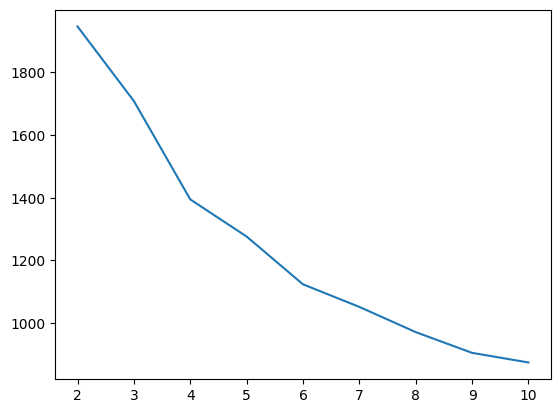

In [24]:
plt.plot(range(2,11), wss)

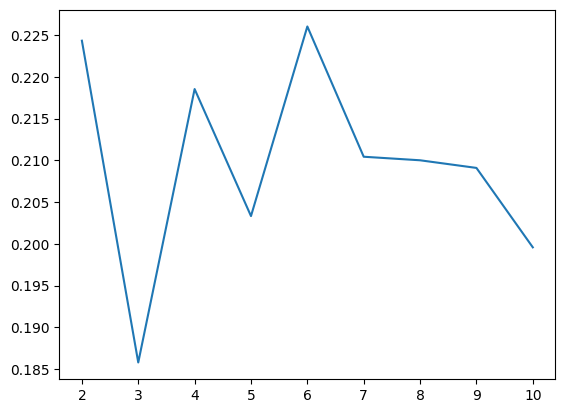

In [25]:
plt.plot(range(2,11), silhoutette)

In [26]:
silhoutette

[np.float64(0.22433949340307874),
 np.float64(0.18577386191472905),
 np.float64(0.2185448613822933),
 np.float64(0.20332191719650128),
 np.float64(0.22604539682166747),
 np.float64(0.2104327655406179),
 np.float64(0.21000816864251282),
 np.float64(0.20909285234940192),
 np.float64(0.19957463618620705)]

# KMeans with K=5

In [27]:
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 5 clusters

In [28]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
silhouette_score(scaled_df,labels)

np.float64(0.1957894899837743)

 final clusters will be 5 due to high

Appending Clusters to the original dataset

In [30]:
data_df["Clus_kmeans5"] = labels
data_df.head(30)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,labels,Clus_kmeans5
0,1,227,147,111,2460,639,1,4
1,2,123,86,65,3510,436,0,3
2,3,306,149,76,2570,669,1,4
3,4,251,112,129,3650,623,0,0
4,5,174,135,128,3400,579,0,3
5,6,200,229,57,3470,625,1,1
6,7,144,88,112,3190,476,0,3
7,8,256,165,46,2930,621,1,2
8,9,282,139,105,2110,658,1,4
9,10,317,196,72,3000,717,1,4


# Cluster Profiling

In [31]:
data_df.Clus_kmeans5.value_counts().sort_index()

,count
Clus_kmeans5,
0,88
1,105
2,90
3,95
4,137


In [32]:
clust_profile=data_df.drop(['Bank'],axis=1)

clust_profile=clust_profile.groupby('Clus_kmeans5').mean()

clust_profile['freq']=data_df.Clus_kmeans5.value_counts().sort_index()

clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,labels,freq
Clus_kmeans5,,,,,,,
0,283.045455,88.295455,99.227273,2939.375000,599.113636,0.420455,88
1,170.666667,186.733333,62.038095,2860.095238,552.085714,0.342857,105
2,286.555556,133.600000,56.022222,3184.000000,608.966667,0.566667,90
3,156.242105,112.736842,97.736842,3161.473684,507.400000,0.052632,95
4,263.861314,200.700730,91.211679,2667.737226,690.364964,1.000000,137


In [33]:
df2=clust_profile.copy()

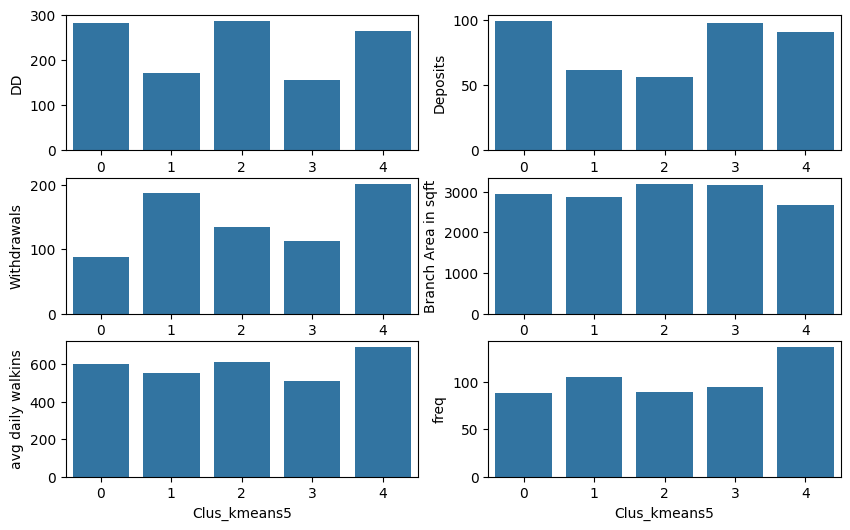

In [34]:
plt.figure(figsize=(10,6))
ax2 = plt.subplot2grid((3, 2), (0, 0), colspan=1, )
sns.barplot(x='Clus_kmeans5', y='DD', data=df2);
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
sns.barplot(x='Clus_kmeans5', y='Withdrawals', data=df2);
ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1)
sns.barplot(x='Clus_kmeans5', y='Deposits', data=df2);
ax2 = plt.subplot2grid((3, 2), (1, 1), colspan=1)
sns.barplot(x='Clus_kmeans5', y='Branch Area in sqft', data=df2);
ax2 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
sns.barplot(x='Clus_kmeans5', y='avg daily walkins', data=df2);
ax2 = plt.subplot2grid((3, 2), (2, 1), colspan=1)
sns.barplot(x='Clus_kmeans5', y='freq', data=df2);

In [35]:
silhouette_samples(scaled_df, labels=data_df['Clus_kmeans5'])

array([ 0.0690211 ,  0.28743964,  0.06907399,  0.14050662,  0.24263227,
        0.10034474,  0.4498909 ,  0.2541411 ,  0.09646412,  0.09289844,
        0.11359757,  0.22973398,  0.11672627,  0.13893117,  0.30173832,
        0.16404755,  0.37794983,  0.211242  ,  0.30417229,  0.10274158,
        0.11239079,  0.36437994,  0.17298814,  0.35058709,  0.1489397 ,
        0.1606044 ,  0.24842065,  0.30392747,  0.04204485,  0.07998634,
        0.37848851, -0.00566719,  0.0479625 ,  0.15851887,  0.2207045 ,
        0.0601361 ,  0.27255522,  0.17939692,  0.30348942,  0.17469277,
        0.39760369,  0.23774109,  0.18486237,  0.22404419,  0.2832556 ,
        0.01260248,  0.03685011,  0.16750246,  0.13538264,  0.17332445,
        0.21393556,  0.09750121,  0.04175766,  0.34631629,  0.34067747,
        0.392528  ,  0.18265173, -0.02117541,  0.03615613,  0.18727907,
        0.38250366, -0.00286112,  0.22572529, -0.0158352 ,  0.251973  ,
       -0.00187774,  0.1831809 ,  0.31013048,  0.38241186,  0.20